In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
from sklearn.metrics import r2_score

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [4]:
test_data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,Not provided,No,...,1,0,0,0,0,0,0,0,0,0.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,Not provided,Yes,...,1,0,0,0,0,0,0,0,63000,0.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,Not provided,Yes,...,1,0,0,0,0,0,0,0,25000,0.0
3,3,3,1100.0,Furnished,Family Only,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,East,Others,Yes,...,1,0,0,0,0,0,0,24000,3,0.0
4,1,1,605.0,Semifurnished,Family Only,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,East,Vitrified,Yes,...,0,0,0,1,0,0,0,0,3,0.0


In [5]:
train_data.shape

(10884, 30)

In [6]:
test_data.shape

(5361, 29)

In [7]:
train_data.duplicated().sum()

82

In [8]:
train_data=train_data.drop_duplicates()
train_data.duplicated().sum()

0

In [9]:
test_data.duplicated().sum()

28

In [10]:
test_data=test_data.drop_duplicates()
test_data.duplicated().sum()

0

In [11]:
train_data['data']='train'
test_data['data']='test'

In [12]:
total=pd.concat([train_data,test_data],axis=0)
total.shape

(16135, 31)

In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135 entries, 0 to 5360
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            16135 non-null  int64  
 1   bathrooms          16135 non-null  int64  
 2   area               16135 non-null  float64
 3   furnishing         16135 non-null  object 
 4   avalable_for       16135 non-null  object 
 5   address            16135 non-null  object 
 6   floor_number       16135 non-null  int64  
 7   facing             16135 non-null  object 
 8   floor_type         16135 non-null  object 
 9   gate_community     16135 non-null  object 
 10  corner_pro         16135 non-null  object 
 11  parking            16135 non-null  int64  
 12  wheelchairadption  16135 non-null  object 
 13  petfacility        16135 non-null  object 
 14  aggDur             16135 non-null  int64  
 15  noticeDur          16135 non-null  int64  
 16  lightbill          1613

In [14]:
total.describe(include='all')

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,data
count,16135.000000,16135.000000,16135.000000,16135,16135,16135,16135.000000,16135,16135,16135,...,16135.000000,16135.000000,16135.000000,16135.000000,16135,16135.000000,1.613500e+04,16135.000000,1.080200e+04,16135
unique,NaN,NaN,NaN,4,8,8645,NaN,9,15,2,...,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Unfurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",NaN,East,Not provided,Yes,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,train
freq,NaN,NaN,NaN,7075,7977,112,NaN,5908,6471,9440,...,NaN,NaN,NaN,NaN,13353,NaN,NaN,NaN,NaN,10802
mean,1.795600,1.778680,534.825272,NaN,NaN,NaN,3.067493,NaN,NaN,NaN,...,0.049582,0.124884,0.031794,0.044066,NaN,6948.611900,1.483967e+05,254.432445,2.864500e+04,NaN
std,0.790967,0.815154,996.706806,NaN,NaN,NaN,2.402190,NaN,NaN,NaN,...,0.217086,0.330597,0.175457,0.205247,NaN,17197.387049,1.417081e+07,1248.327763,1.187731e+06,NaN
min,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,1.600000e+03,NaN
25%,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,4.000000e+00,0.000000,1.050000e+04,NaN
50%,2.000000,2.000000,520.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,3.000000e+04,0.000000,1.500000e+04,NaN
75%,2.000000,2.000000,840.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,8000.000000,5.000000e+04,0.000000,2.100000e+04,NaN


In [15]:
total['mnt_amt'].value_counts()

0.000000       13353
500.000000       336
1.000000         331
1000.000000      266
1500.000000      195
               ...  
1035.000000        1
330.000000         1
2666.000000        1
4166.666667        1
2450.000000        1
Name: mnt_amt, Length: 180, dtype: int64

In [16]:
total['deposit_amt'].value_counts()

50000     1975
3         1728
0         1670
30000     1423
40000     1144
          ... 
6500         1
20001        1
144000       1
19800        1
38000        1
Name: deposit_amt, Length: 235, dtype: int64

In [17]:
total['brok_amt'].value_counts()

0         11617
25000       237
15000       232
1           225
20000       221
          ...  
9             1
12570         1
147000        1
115000        1
16700         1
Name: brok_amt, Length: 183, dtype: int64

In [18]:
total['maintenance_amt'].value_counts()

0                                    13353
Maintenance 500/ (/ month              317
Maintenance 1/ (/ month                264
Maintenance 1000/ (/ month             242
Maintenance 1500/ (/ month             181
                                     ...  
Maintenance 10000/ ((one time fee        1
Maintenance 2666/ (/ month               1
Maintenance 50000/ (/ year               1
Maintenance 11500/ (/ month              1
Maintenance 2450/ (/ month               1
Name: maintenance_amt, Length: 217, dtype: int64

In [19]:
total['pooja_room'].value_counts()

0    15142
1      993
Name: pooja_room, dtype: int64

In [20]:
total['no_room'].value_counts()

1    12107
0     4028
Name: no_room, dtype: int64

In [21]:
total['propertyage'].value_counts()

1 to 5 Year Old       5640
5 to 10 Year Old      4826
10+ Year Old          3219
0 to 1 Year Old       2179
Under Construction     252
NO age                  19
Name: propertyage, dtype: int64

In [22]:
total['propertyage']=np.where(total['propertyage']=='NO age','1 to 5 Year Old',total['propertyage'])
total['propertyage']=np.where(total['propertyage']=='Under Construction',0,total['propertyage'])
total['propertyage']=np.where(total['propertyage']=='0 to 1 Year Old',1,total['propertyage'])
total['propertyage']=np.where(total['propertyage']=='1 to 5 Year Old',2,total['propertyage'])
total['propertyage']=np.where(total['propertyage']=='5 to 10 Year Old',3,total['propertyage'])
total['propertyage']=np.where(total['propertyage']=='10+ Year Old',4,total['propertyage'])

In [23]:
total['propertyage'].value_counts()

2    5659
3    4826
4    3219
1    2179
0     252
Name: propertyage, dtype: int64

In [24]:
total['powerbackup'].unique()

array([2, 0, 1], dtype=int64)

In [25]:
total['lightbill'].unique()

array([0, 1], dtype=int64)

In [26]:
total['noticeDur'].unique()

array([2, 1, 0, 3, 6, 5, 4], dtype=int64)

In [27]:
total['aggDur'].unique()

array([11, 12,  0, 24, 22, 36,  1,  6, 33,  7, 13, 23, 18,  3,  5, 14,  2,
       30,  4,  9, 15, 21, 10, 16, 17, 31, 35], dtype=int64)

In [28]:
total['petfacility'].value_counts()

None    12534
Yes      3601
Name: petfacility, dtype: int64

In [29]:
total['petfacility']=np.where(total['petfacility']=='None','No',total['petfacility'])

In [30]:
total['petfacility'].value_counts()

No     12534
Yes     3601
Name: petfacility, dtype: int64

In [31]:
total['wheelchairadption'].value_counts()

None    13257
Yes      2878
Name: wheelchairadption, dtype: int64

In [32]:
total['wheelchairadption']=np.where(total['wheelchairadption']=='None','No',total['wheelchairadption'])

In [33]:
total['wheelchairadption'].value_counts()

No     13257
Yes     2878
Name: wheelchairadption, dtype: int64

In [34]:
total['parking'].value_counts()

1    11940
0     3178
2      865
3       85
4       42
5       16
6        6
8        1
9        1
7        1
Name: parking, dtype: int64

In [35]:
total['corner_pro'].value_counts()

No     13852
Yes     2283
Name: corner_pro, dtype: int64

In [36]:
total['gate_community'].value_counts()

Yes    9440
No     6695
Name: gate_community, dtype: int64

In [37]:
total['floor_type'].value_counts()

Not provided         6471
Vitrified            5410
Ceramic              1529
Marble               1189
Mosaic                366
Others                309
Spartex               278
Granite               243
Wood                   98
Concrete               89
Polished concrete      49
Cement                 43
Vinyl                  32
Stone                  24
IPSFinish               5
Name: floor_type, dtype: int64

In [38]:
total['floor_type']=np.where(total['floor_type']=='Not provided','Vitrified',total['floor_type'])

In [39]:
total['floor_type'].value_counts()

Vitrified            11881
Ceramic               1529
Marble                1189
Mosaic                 366
Others                 309
Spartex                278
Granite                243
Wood                    98
Concrete                89
Polished concrete       49
Cement                  43
Vinyl                   32
Stone                   24
IPSFinish                5
Name: floor_type, dtype: int64

In [40]:
total['facing'].value_counts()

East            5908
No Direction    5238
West            1440
North           1070
North-East       814
South            542
North-West       394
South-East       369
South-West       360
Name: facing, dtype: int64

In [41]:
total['facing']=np.where(total['facing']=='No Direction','East',total['facing'])
total['facing']=np.where(total['facing']=='North-East','North',total['facing'])
total['facing']=np.where(total['facing']=='North-West','North',total['facing'])
total['facing']=np.where(total['facing']=='South-East','South',total['facing'])
total['facing']=np.where(total['facing']=='South-West','South',total['facing'])

In [42]:
total['facing'].value_counts()

East     11146
North     2278
West      1440
South     1271
Name: facing, dtype: int64

In [43]:
address_list = list(total["address"].values)
address_list[0]
new_list=[]
for i in address_list:
    new_list.append(i.split(',')[1].lstrip())
total['location']=np.array(new_list)

In [44]:
total=total.drop(['address'],axis=1)
total.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,data,location
0,2,2,1050.0,Unfurnished,All,5,West,Marble,Yes,No,...,0,0,0,0,0,3,0.0,20000.0,train,Pingale Wasti
1,2,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,Yes,...,0,0,0,0,0,40000,0.0,14000.0,train,Wagholi
2,3,3,0.0,Semifurnished,All,1,South,Vitrified,Yes,No,...,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0,train,Mahalunge
3,1,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,No,...,0,0,0,0,0,40000,0.0,13000.0,train,Wanowrie
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",6,South,Polished concrete,Yes,Yes,...,0,0,0,0,0,20,0.0,7500.0,train,Uruli Devachi


In [45]:
total['avalable_for'].value_counts()

All                                7977
Family Only                        6625
Family , Bachelors (Women Only)     665
Family , Bachelors (Men Only)       397
Bachelors (Men/Women)               168
Bachelors (Men Only)                146
Bachelors (Women Only)              109
None                                 48
Name: avalable_for, dtype: int64

In [46]:
total['avalable_for']=np.where(total['avalable_for']=='None','All',total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='All',1,total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='Family Only',2,total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='Family , Bachelors (Women Only)',3,total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='Family , Bachelors (Men Only)',4,total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='Bachelors (Men/Women)',5,total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='Bachelors (Men Only)',6,total['avalable_for'])
total['avalable_for']=np.where(total['avalable_for']=='Bachelors (Women Only)',7,total['avalable_for'])

In [47]:
total['avalable_for'].value_counts()

1    8025
2    6625
3     665
4     397
5     168
6     146
7     109
Name: avalable_for, dtype: int64

In [48]:
total['area'].value_counts()

0.00       5945
500.00      427
550.00      424
1000.00     398
800.00      359
           ... 
2597.00       1
476.00        1
1970.00       1
1349.00       1
59.02         1
Name: area, Length: 1166, dtype: int64

In [49]:
total['area']=np.where(total['area']==0,520,total['area'])

In [50]:
total['area'].value_counts()

520.00     5991
500.00      427
550.00      424
1000.00     398
800.00      359
           ... 
2597.00       1
476.00        1
1970.00       1
1349.00       1
59.02         1
Name: area, Length: 1165, dtype: int64

In [51]:
total['furnishing'].value_counts()

Unfurnished      7075
Semifurnished    6353
Furnished        2701
Unfurnishe          6
Name: furnishing, dtype: int64

In [52]:
total['furnishing']=np.where(total['furnishing']=='Unfurnishe','Unfurnished',total['furnishing'])

In [53]:
total['furnishing'].value_counts()

Unfurnished      7081
Semifurnished    6353
Furnished        2701
Name: furnishing, dtype: int64

In [54]:
numerical_col=['bedroom','bathrooms','area','floor_number','brok_amt','deposit_amt','mnt_amt']
numerical_col

['bedroom',
 'bathrooms',
 'area',
 'floor_number',
 'brok_amt',
 'deposit_amt',
 'mnt_amt']

In [55]:
out_col=['bedroom','bathrooms','area','brok_amt','deposit_amt','mnt_amt']
out_col

['bedroom', 'bathrooms', 'area', 'brok_amt', 'deposit_amt', 'mnt_amt']

In [56]:
def outliers(col):
    Q1=total[col].quantile(0.25)
    Q3=total[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    total[col]=np.where(total[col]<lower_limit,lower_limit,np.where(total[col]>upper_limit,upper_limit,total[col]))

In [57]:
for i in out_col:
    outliers(i)

In [64]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135 entries, 0 to 5360
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            16135 non-null  float64
 1   bathrooms          16135 non-null  float64
 2   area               16135 non-null  float64
 3   furnishing         16135 non-null  object 
 4   avalable_for       16135 non-null  object 
 5   floor_number       16135 non-null  int64  
 6   facing             16135 non-null  object 
 7   floor_type         16135 non-null  object 
 8   gate_community     16135 non-null  object 
 9   corner_pro         16135 non-null  object 
 10  parking            16135 non-null  int64  
 11  wheelchairadption  16135 non-null  object 
 12  petfacility        16135 non-null  object 
 13  aggDur             16135 non-null  int64  
 14  noticeDur          16135 non-null  int64  
 15  lightbill          16135 non-null  int64  
 16  powerbackup        1613

In [65]:
total['avalable_for']=total['avalable_for'].astype(int)

In [66]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135 entries, 0 to 5360
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            16135 non-null  float64
 1   bathrooms          16135 non-null  float64
 2   area               16135 non-null  float64
 3   furnishing         16135 non-null  object 
 4   avalable_for       16135 non-null  int32  
 5   floor_number       16135 non-null  int64  
 6   facing             16135 non-null  object 
 7   floor_type         16135 non-null  object 
 8   gate_community     16135 non-null  object 
 9   corner_pro         16135 non-null  object 
 10  parking            16135 non-null  int64  
 11  wheelchairadption  16135 non-null  object 
 12  petfacility        16135 non-null  object 
 13  aggDur             16135 non-null  int64  
 14  noticeDur          16135 non-null  int64  
 15  lightbill          16135 non-null  int64  
 16  powerbackup        1613

In [67]:
print('Before drop:',total.shape)
total.drop(total[total['rent']>=123456789].index,axis=0,inplace=True)
print('After drop:',total.shape)

Before drop: (16135, 31)
After drop: (16133, 31)


<Figure size 1200x1000 with 0 Axes>

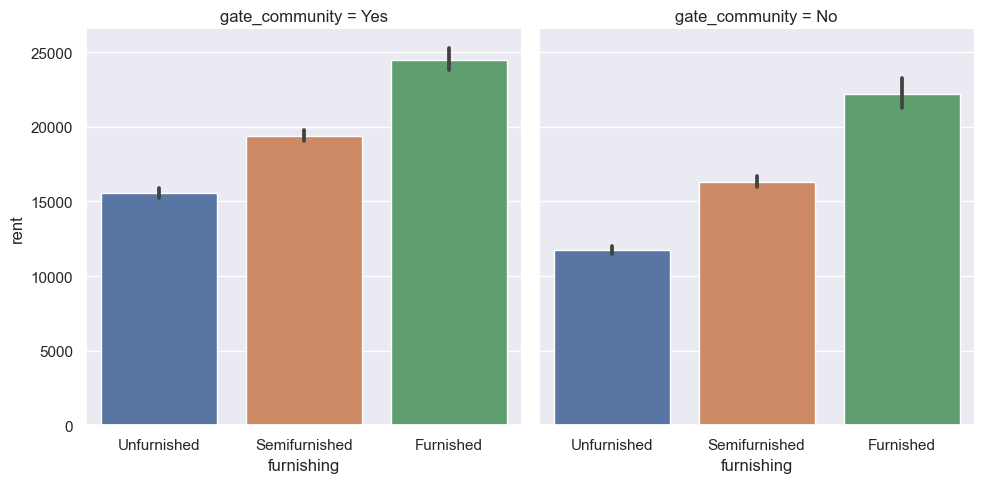

In [68]:
plt.figure(figsize=(12,10))
sns.catplot(total,x='furnishing',y='rent',kind='bar',col='gate_community')
plt.show()

<Figure size 1200x1000 with 0 Axes>

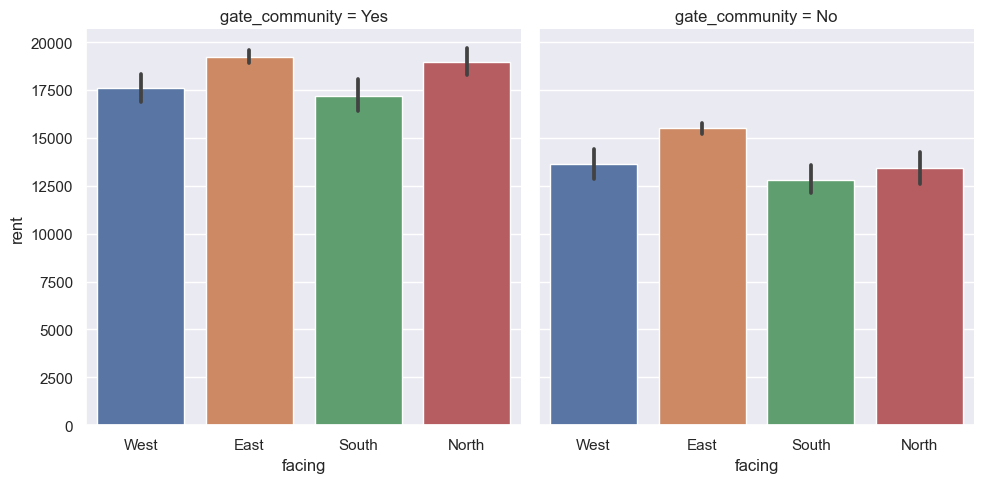

In [69]:
plt.figure(figsize=(12,10))
sns.catplot(total,x='facing',y='rent',kind='bar',col='gate_community')
plt.show()

In [70]:
X=total.groupby('facing')['rent'].max().sort_values(ascending=False).head()
X

facing
East     98000.0
North    95000.0
West     90000.0
South    80000.0
Name: rent, dtype: float64

In [71]:
Y=total.groupby('furnishing')['rent'].max().sort_values(ascending=False).head()
Y

furnishing
Semifurnished    98000.0
Furnished        95000.0
Unfurnished      90000.0
Name: rent, dtype: float64

In [72]:
Z=total.groupby('location')['rent'].max().sort_values(ascending=False).head()
Z

location
Eon Free Zone     98000.0
Kalyani Nagar     95000.0
Karve Nagar       90000.0
Kharadi           90000.0
Baner             90000.0
Name: rent, dtype: float64

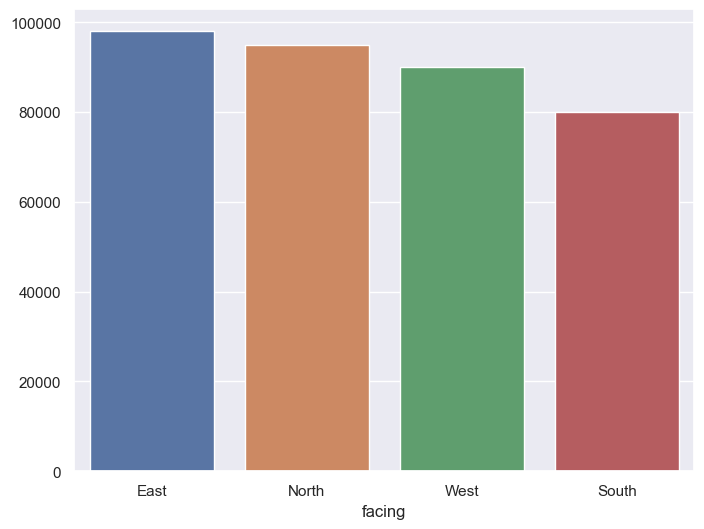

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(total,x=X.index,y=X.values)
plt.show()

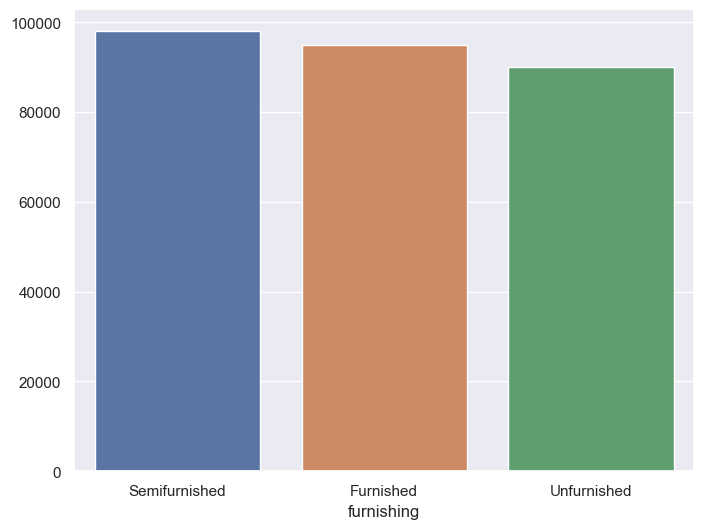

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(total,x=Y.index,y=Y.values)
plt.show()

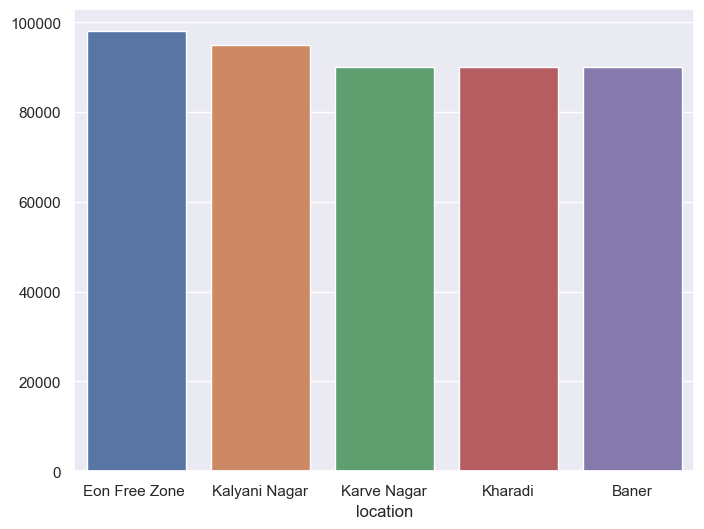

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(total,x=Z.index,y=Z.values)
plt.show()

In [76]:
total=total.drop(['location','maintenance_amt','mnt_amt'],axis=1)

In [77]:
cat_col=['furnishing','facing','floor_type','gate_community','corner_pro','wheelchairadption','petfacility',
        'propertyage']
cat_col

['furnishing',
 'facing',
 'floor_type',
 'gate_community',
 'corner_pro',
 'wheelchairadption',
 'petfacility',
 'propertyage']

In [78]:
le=LabelEncoder()
for i in cat_col:
    total[i]=le.fit_transform(total[i])

In [79]:
total.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,rent,data
0,2.0,2.0,1050.0,2,1,5,3,5,1,0,...,1,0,0,0,0,0,0.0,3.0,20000.0,train
1,2.0,2.0,760.0,2,1,5,0,12,1,1,...,1,0,0,0,0,0,0.0,40000.0,14000.0,train
2,3.0,3.0,520.0,1,1,1,2,12,1,0,...,0,0,0,1,0,0,20000.0,60000.0,22999.0,train
3,1.0,1.0,628.0,0,2,3,0,6,1,0,...,1,0,0,0,0,0,0.0,40000.0,13000.0,train
4,2.0,2.0,668.0,1,4,6,2,8,1,1,...,1,0,0,0,0,0,0.0,20.0,7500.0,train


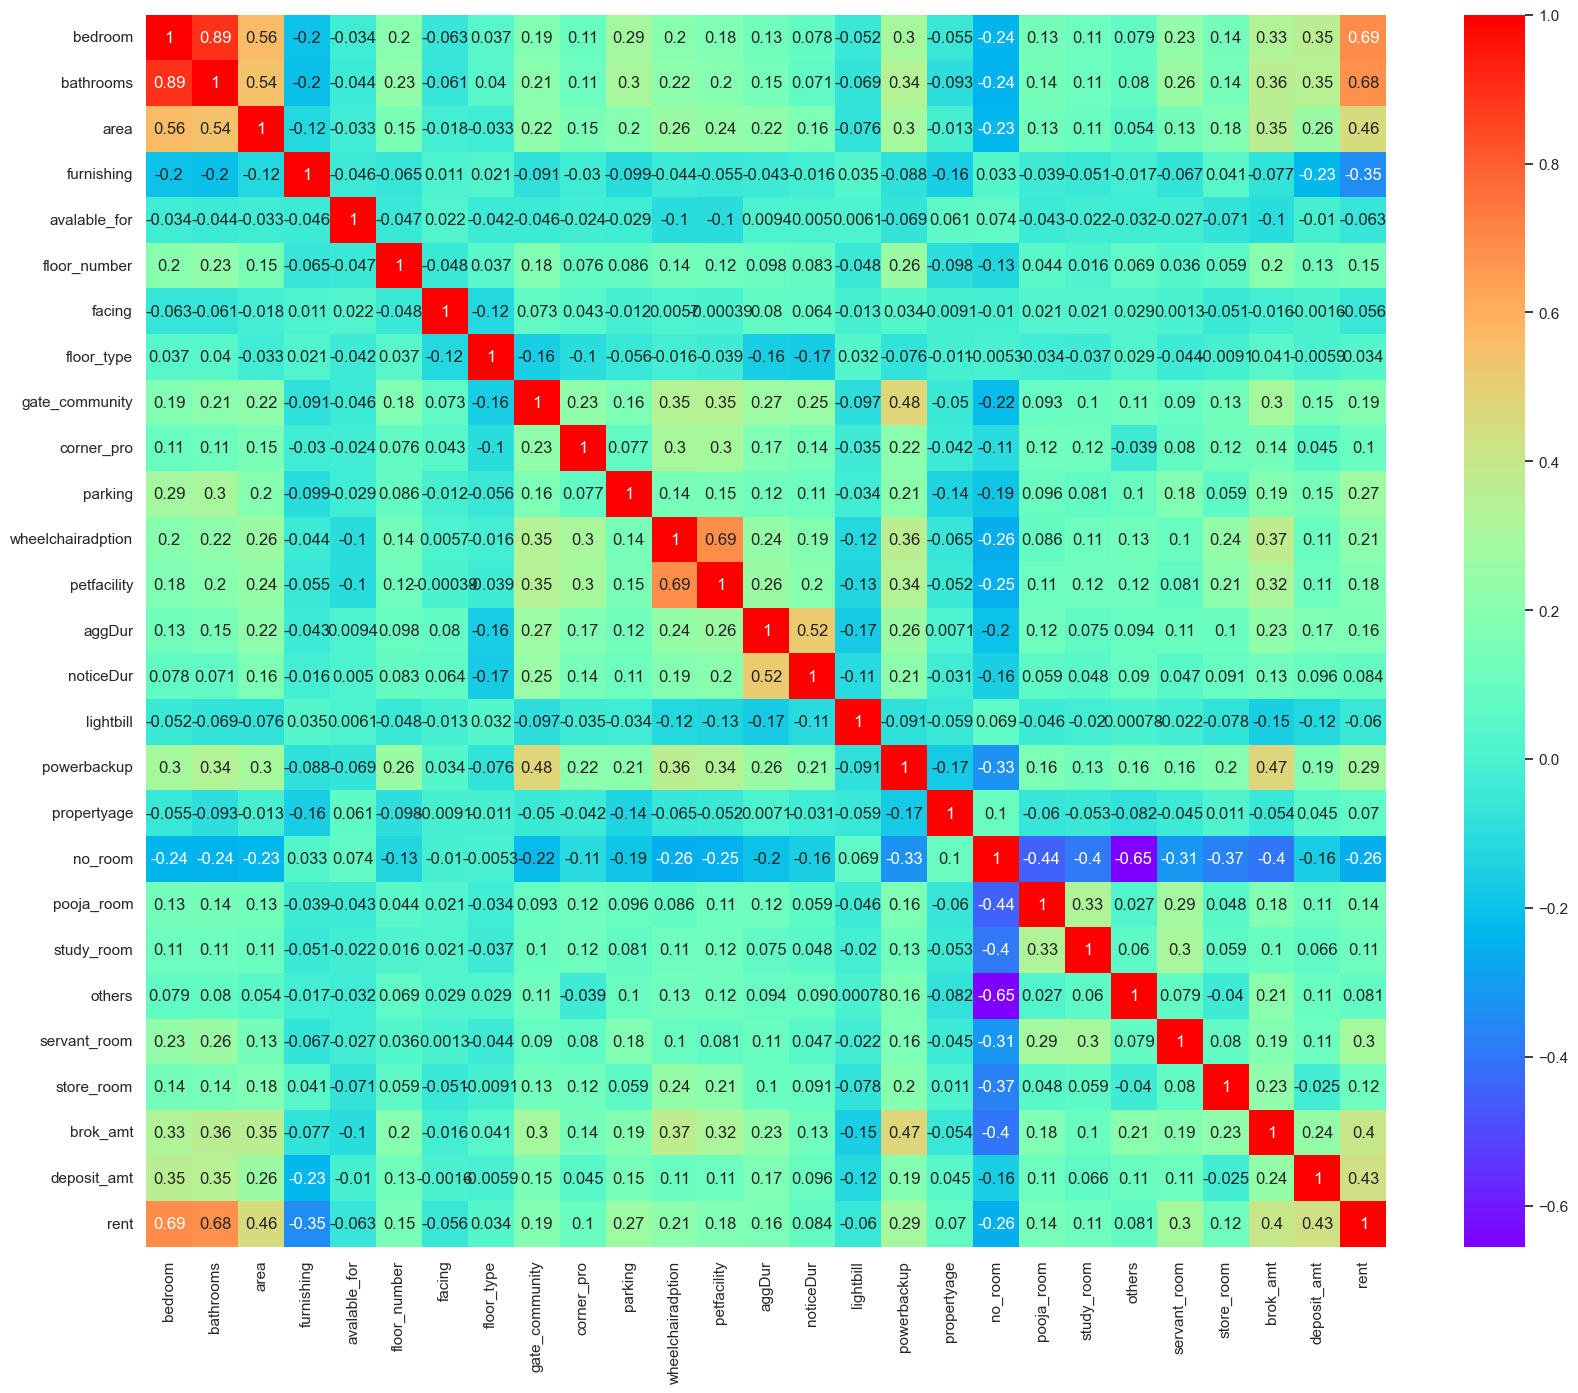

In [80]:
plt.figure(figsize=(20,16))
sns.heatmap(total.corr(),annot=True,cmap='rainbow')
plt.show()

In [82]:
total=total.drop(['bedroom'],axis=1)

In [83]:
train=total[total['data']=='train']
test=total[total['data']=='test']

In [84]:
train=train.drop(['data'],axis=1)
test=test.drop(['data','rent'],axis=1)

In [85]:
x=train.drop(['rent'],axis=1)
y=train['rent']

In [86]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(10801, 25)

In [87]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.790863,bathrooms
1,1.559663,area
2,1.123989,furnishing
3,1.028043,avalable_for
4,1.122832,floor_number
5,1.035922,facing
6,1.096430,floor_type
7,1.493395,gate_community
8,1.170073,corner_pro
9,1.166928,parking


In [88]:
df=train.copy()

In [89]:
df=df.drop(['no_room'],axis=1)

In [90]:
x=df.drop(['rent'],axis=1)
y=df['rent']

In [91]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(10801, 24)

In [92]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.790172,bathrooms
1,1.556513,area
2,1.123708,furnishing
3,1.027718,avalable_for
4,1.121330,floor_number
5,1.035918,facing
6,1.095018,floor_type
7,1.493244,gate_community
8,1.170034,corner_pro
9,1.164270,parking


In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [94]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rent   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3007.
Date:                Sat, 17 Feb 2024   Prob (F-statistic):                        0.00
Time:                        10:05:53   Log-Likelihood:                         -88111.
No. Observations:                8640   AIC:                                  1.763e+05
Df Residuals:                    8616   BIC:                                  1.764e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bathrooms          6801.4330    127.852     53.198      0.000    6550.812    7052.054
area                  3.0459      0.323      9.438      0.000       2.413       3.679
furnishing        -2359.7063     89.774    -26.285      0.000   -2535.685   -2183.728
avalable_for       -396.5221     70.007     -5.664      0.000    -533.753    -259.291
floor_number        -94.5448     30.853     -3.064      0.002    -155.025     -34.065
facing             -121.8469     72.225     -1.687      0.092    -263.425      19.731
floor_type           88.4601     17.164      5.154      0.000      54.814     122.107
gate_community     -223.5001    172.356     -1.297      0.195    -561.359     114.359
corner_pro           32.9983    219.023      0.151      0.880    -396.339     462.335
parking             990.3220    132.323      7.484      0.000     730.937    1249.707
wheelchairadption   478.6090    265.693      1.801      0.072     -42.213     999.431
petfacility        -495.5453    240.426     -2.061      0.039    -966.838     -24.252
aggDur               14.4107     11.339      1.271      0.204      -7.816      36.638
noticeDur           206.1772    120.027      1.718      0.086     -29.104     441.458
lightbill           862.3718    190.622      4.524      0.000     488.707    1236.037
powerbackup          34.7592    109.330      0.318      0.751    -179.554     249.073
propertyage        1072.8397     62.782     17.088      0.000     949.772    1195.907
pooja_room         -369.2616    320.946     -1.151      0.250    -998.393     259.870
study_room           -1.6643    353.759     -0.005      0.996    -695.117     691.789
others             -573.0969    222.418     -2.577      0.010   -1009.089    -137.104
servant_room       5649.1785    441.033     12.809      0.000    4784.648    6513.709
store_room          378.4587    356.759      1.061      0.289    -320.875    1077.792
brok_amt              0.1600      0.011     14.277      0.000       0.138       0.182
deposit_amt           0.0479      0.003     18.994      0.000       0.043       0.053
==============================================================================
Omnibus:                     4963.927   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89990.848
Skew:                           2.386   Prob(JB):                         0.00
Kurtosis:                      18.073   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly spec

In [95]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500,bootstrap=True,oob_score=True)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, oob_score=True)

In [97]:
train_pred=rf.predict(x_train)
test_pred=rf.predict(x_test)

In [99]:
print('Training Accuracy is: ',r2_score(y_train,train_pred))
print('Test Accuracy is: ',r2_score(y_test,test_pred))

Training Accuracy is:  0.9591518113052884
Test Accuracy is:  0.7470241300161132


In [100]:
cvs=cross_val_score(rf,x_train,y_train,cv=10)
print('10 Accuracy is: ',cvs)
print('Avg Accuracy is: ',cvs.mean())
print('Max Accuracy is: ',cvs.max())

10 Accuracy is:  [0.72145088 0.70494511 0.71453458 0.65265635 0.74247739 0.7137033
 0.6778779  0.72436776 0.76372419 0.72570782]
Avg Accuracy is:  0.7141445284481424
Max Accuracy is:  0.7637241933768272


In [102]:
test=test.drop(['no_room'],axis=1)
test1=scaler.transform(test)

In [103]:
final_op=rf.predict(test1)
final_op

array([18710.45714286, 21779.6       , 12740.08      , ...,
       16509.        , 31666.198     , 38014.4       ])

In [104]:
final=pd.concat([test,pd.DataFrame(final_op)],axis=1)
final.head()

,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,...,powerbackup,propertyage,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,0
0,2.0,520.0,1.0,1.0,1.0,0.0,12.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18710.457143
1,2.0,1050.0,1.0,1.0,2.0,3.0,12.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000.0,21779.600000
2,2.0,900.0,1.0,1.0,6.0,0.0,12.0,1.0,0.0,1.0,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,12740.080000
3,3.0,1100.0,0.0,2.0,1.0,0.0,7.0,1.0,0.0,1.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,20000.0,3.0,34657.849215
4,1.0,605.0,1.0,2.0,4.0,0.0,12.0,1.0,1.0,1.0,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,13171.200000
